****Youtube Preprocessing****

In [2]:
!pip install youtube_transcript_api

In [3]:
from youtube_transcript_api import YouTubeTranscriptApi

In [4]:
from IPython.display import YouTubeVideo

In [5]:
video=input("Enter the link of your YouTube Video: ")

Enter the link of your YouTube Video:  https://www.youtube.com/watch?v=TIBWhm_p0fs


In [6]:
id_video=video.split("=")[1]
print(id_video)

TIBWhm_p0fs


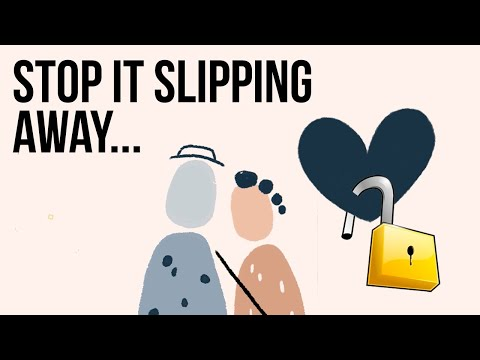

In [7]:
YouTubeVideo(id_video)

In [8]:
transcript = YouTubeTranscriptApi.get_transcript(id_video)

In [9]:
transcript

[{'text': 'when relationships start enthusiasm for',
  'start': 4.319,
  'duration': 5.82},
 {'text': 'our partners is typically natural and',
  'start': 7.379,
  'duration': 5.041},
 {'text': 'very intense we think of them constantly',
  'start': 10.139,
  'duration': 4.201},
 {'text': 'we only want to spend more time in their',
  'start': 12.42,
  'duration': 4.14},
 {'text': 'company we Delight in their many skills',
  'start': 14.34,
  'duration': 5.34},
 {'text': 'and accomplishments but this early phase',
  'start': 16.56,
  'duration': 5.219},
 {'text': 'of powerful admiration and longing',
  'start': 19.68,
  'duration': 4.62},
 {'text': 'rarely lasts', 'start': 21.779, 'duration': 5.041},
 {'text': 'the world often explains this cooling as',
  'start': 24.3,
  'duration': 4.62},
 {'text': 'just an inevitable result of sheer',
  'start': 26.82,
  'duration': 5.039},
 {'text': 'exposure it is they say typical to',
  'start': 28.92,
  'duration': 7.26},
 {'text': 'neglect what or

In [13]:
doc = ""
for line in transcript:
    doc =doc+ ' ' + line['text']
print(type(doc))
print(doc)
print(len(doc))

<class 'str'>
 when relationships start enthusiasm for our partners is typically natural and very intense we think of them constantly we only want to spend more time in their company we Delight in their many skills and accomplishments but this early phase of powerful admiration and longing rarely lasts the world often explains this cooling as just an inevitable result of sheer exposure it is they say typical to neglect what or who is always around true reasons seem more complicated more psychologically rich and in their own way a lot more hopeful if we stop admiring our lovers it is chiefly for one reason because we are at some level Furious anger destroys admiration we cease to love because we unknowingly grow entangled in various forms of unprocessed Fury we can't cheer our partner on because somewhere deep inside we grow inhibited by Trace memories of certain letdowns large and small of which they've been guilty perhaps they caused us immense difficulties around exams and never apol

In [14]:
doc=[]
for line in transcript:
  if "\n" in line['text']:
    x=line['text'].replace("\n"," ")
    doc.append(x)
  else:
    doc.append(line['text'])
print(doc)

['when relationships start enthusiasm for', 'our partners is typically natural and', 'very intense we think of them constantly', 'we only want to spend more time in their', 'company we Delight in their many skills', 'and accomplishments but this early phase', 'of powerful admiration and longing', 'rarely lasts', 'the world often explains this cooling as', 'just an inevitable result of sheer', 'exposure it is they say typical to', 'neglect what or who is always around', 'true reasons seem more complicated more', 'psychologically rich and in their own', 'way a lot more hopeful', 'if we stop admiring our lovers it is', 'chiefly for one reason because we are at', 'some level', 'Furious anger destroys admiration we', 'cease to love because we unknowingly', 'grow entangled in various forms of', "unprocessed Fury we can't cheer our", 'partner on because somewhere deep inside', 'we grow inhibited by Trace memories of', 'certain letdowns large and small of', "which they've been guilty", 'perhap

In [15]:
paragraph=" ".join(doc)
print(paragraph)

when relationships start enthusiasm for our partners is typically natural and very intense we think of them constantly we only want to spend more time in their company we Delight in their many skills and accomplishments but this early phase of powerful admiration and longing rarely lasts the world often explains this cooling as just an inevitable result of sheer exposure it is they say typical to neglect what or who is always around true reasons seem more complicated more psychologically rich and in their own way a lot more hopeful if we stop admiring our lovers it is chiefly for one reason because we are at some level Furious anger destroys admiration we cease to love because we unknowingly grow entangled in various forms of unprocessed Fury we can't cheer our partner on because somewhere deep inside we grow inhibited by Trace memories of certain letdowns large and small of which they've been guilty perhaps they caused us immense difficulties around exams and never apologized maybe th

***Done With PreProcessing Steps***

****NLTK Summarization****

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
mytext= paragraph

In [20]:
stops = set(stopwords.words('english'))
word_array = word_tokenize(mytext)

wordfreq=dict()
for word in word_array:
  word=word.lower()
  if word in stops:
    continue
  elif word in wordfreq:
    wordfreq[word]+=1
  else:
    wordfreq[word]=1

#word_array
#frequencytable


In [21]:
sent_array=sent_tokenize(mytext)

sentfreq=dict()
for sentence in sent_array:
  for word,freq in wordfreq.items():
    if word in sentence.lower():
      if sentence in sentfreq:
        sentfreq[sentence]+=freq
      else:
        sentfreq[sentence]=freq  

#sentfreq

In [22]:
averageval=0
for sentence in sentfreq:
  averageval+=sentfreq[sentence]

average=int(averageval/len(sentfreq))

In [37]:
summary=''
for sentence in sent_array:
    if(sentence in sentfreq) and (sentfreq[sentence]>(.99*average)):
        summary=summary+" "+sentence
print(summary)

 when relationships start enthusiasm for our partners is typically natural and very intense we think of them constantly we only want to spend more time in their company we Delight in their many skills and accomplishments but this early phase of powerful admiration and longing rarely lasts the world often explains this cooling as just an inevitable result of sheer exposure it is they say typical to neglect what or who is always around true reasons seem more complicated more psychologically rich and in their own way a lot more hopeful if we stop admiring our lovers it is chiefly for one reason because we are at some level Furious anger destroys admiration we cease to love because we unknowingly grow entangled in various forms of unprocessed Fury we can't cheer our partner on because somewhere deep inside we grow inhibited by Trace memories of certain letdowns large and small of which they've been guilty perhaps they caused us immense difficulties around exams and never apologized maybe t

****Spacy Summarization****


In [38]:
!pip install spacy
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [39]:
stopwords=list(STOP_WORDS)
from string import punctuation
punctuation=punctuation+ '\n'
#punctuation

In [40]:
text=paragraph
space = spacy.load('en_core_web_sm')
doc= space(text)

In [42]:
word_frequencies={}
for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1

In [43]:
max_frequency=max(word_frequencies.values())
for word in word_frequencies.keys():
    word_frequencies[word]=word_frequencies[word]/max_frequency

In [44]:
sentence_tokens= [sent for sent in doc.sents]
sentence_scores = {}
for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():                            
                sentence_scores[sent]=word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent]+=word_frequencies[word.text.lower()]
#sentence_scores  

In [65]:
percent=int(input("How much percentage of summary you want? "))
ratio=(int(percent)) / 100
#ratio

How much percentage of summary you want?  50


In [66]:
from heapq import nlargest
select_length=int(len(sentence_tokens)*ratio)
select_length
summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)
summary

[yet it's not the simple fact of being let down that counts very much the true problem comes about when there hasn't been an opportunity to process our disappointment irritation is only ever toxic when it can't be rapidly and thoroughly discussed perhaps we tried to explain what was wrong but we got nowhere or more subtly we might have felt unentitled to make a fuss over so-called small things and therefore said nothing even though in our depths the Small Things mattered immensely to us with great unfairness to our partner we may have forgotten to admit to our own sensitivities even as we developed a steady burden of resentment on their account what follows from such buried anger is something that can be mistaken for mere disinterest we're not so keen on celebrating their birthday anymore we withhold sexual attention we don't look up when they walk in a room this could seem like the normal impact of time and familiarity but it is no such thing it's evidence of cold Fury we do our anger

In [67]:
final_summary=[word.text for word in summary]
final_summary
summary=''.join(final_summary)
summary

"yet it's not the simple fact of being let down that counts very much the true problem comes about when there hasn't been an opportunity to process our disappointment irritation is only ever toxic when it can't be rapidly and thoroughly discussed perhaps we tried to explain what was wrong but we got nowhere or more subtly we might have felt unentitled to make a fuss over so-called small things and therefore said nothing even though in our depths the Small Things mattered immensely to us with great unfairness to our partner we may have forgotten to admit to our own sensitivities even as we developed a steady burden of resentment on their account what follows from such buried anger is something that can be mistaken for mere disinterest we're not so keen on celebrating their birthday anymore we withhold sexual attention we don't look up when they walk in a room this could seem like the normal impact of time and familiarity but it is no such thing it's evidence of cold Fury we do our anger

****Translation****


In [68]:
!pip install deep-translator

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.0 MB/s eta 0:00:00


In [69]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15736 sha256=77d467f14a5fb677e28e40360018db9a2b50a3542ff4e3765f699550c2bef19c
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11

In [70]:
import googletrans

In [71]:
from deep_translator import GoogleTranslator
from deep_translator import MicrosoftTranslator

In [74]:
print("CHECK OUT YOUR SOURCE LANGUAGE FROM BELOW:")
print(" ")
langdict=googletrans.LANGUAGES
for i in langdict :
    print(i+"-" +langdict[i])
srclang=input("ENTER LANGUAGE CODE: ")

CHECK OUT YOUR SOURCE LANGUAGE FROM BELOW:
 
af-afrikaans
sq-albanian
am-amharic
ar-arabic
hy-armenian
az-azerbaijani
eu-basque
be-belarusian
bn-bengali
bs-bosnian
bg-bulgarian
ca-catalan
ceb-cebuano
ny-chichewa
zh-cn-chinese (simplified)
zh-tw-chinese (traditional)
co-corsican
hr-croatian
cs-czech
da-danish
nl-dutch
en-english
eo-esperanto
et-estonian
tl-filipino
fi-finnish
fr-french
fy-frisian
gl-galician
ka-georgian
de-german
el-greek
gu-gujarati
ht-haitian creole
ha-hausa
haw-hawaiian
iw-hebrew
he-hebrew
hi-hindi
hmn-hmong
hu-hungarian
is-icelandic
ig-igbo
id-indonesian
ga-irish
it-italian
ja-japanese
jw-javanese
kn-kannada
kk-kazakh
km-khmer
ko-korean
ku-kurdish (kurmanji)
ky-kyrgyz
lo-lao
la-latin
lv-latvian
lt-lithuanian
lb-luxembourgish
mk-macedonian
mg-malagasy
ms-malay
ml-malayalam
mt-maltese
mi-maori
mr-marathi
mn-mongolian
my-myanmar (burmese)
ne-nepali
no-norwegian
or-odia
ps-pashto
fa-persian
pl-polish
pt-portuguese
pa-punjabi
ro-romanian
ru-russian
sm-samoan
gd-scots gae

ENTER LANGUAGE CODE:  hi


In [75]:
to_translate = summary
translated = GoogleTranslator(source='auto', target=srclang).translate(to_translate)
print("YOUR TRANSLATED SUMMARY IS GIVEN BELOW:")
print(" ")
print(translated)

YOUR TRANSLATED SUMMARY IS GIVEN BELOW:
 
फिर भी यह निराश होने का साधारण तथ्य नहीं है जो बहुत मायने रखता है, सच्ची समस्या तब उत्पन्न होती है जब हमारी निराशा को दूर करने का कोई अवसर नहीं होता है, जलन केवल तभी विषाक्त होती है जब इस पर तेजी से और पूरी तरह से चर्चा नहीं की जा सकती है, शायद हमने कोशिश की थी समझाएं कि क्या गलत था, लेकिन हम कहीं नहीं पहुंचे या अधिक सूक्ष्मता से कहें तो हम तथाकथित छोटी-छोटी बातों पर हंगामा करने के लिए अयोग्य महसूस कर सकते थे और इसलिए कुछ भी नहीं कहा, भले ही हमारी गहराई में छोटी-छोटी बातें हमारे लिए बहुत मायने रखती थीं और हमारे साथी के साथ बहुत अन्याय हो सकता था। हम अपनी संवेदनाओं को स्वीकार करना भूल गए हैं, भले ही हमने उनके कारण नाराजगी का एक स्थिर बोझ विकसित किया हो, इस तरह के दबे हुए गुस्से से जो कुछ होता है वह कुछ ऐसा है जिसे केवल अरुचि के लिए गलत समझा जा सकता है, हम अब उनका जन्मदिन मनाने के लिए इतने उत्सुक नहीं हैं, हम यौन ध्यान को रोकते हैं जब वे किसी कमरे में चलते हैं तो हम ऊपर नहीं देखते हैं, यह समय और परिचितता का सामान्य प्रभाव लग सकता है, लेकिन यह ऐसी

****Text To Speech****

In [76]:
!pip install gTTS

In [77]:
!pip install pyttsx3  

In [78]:
!pip install pygobject

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 720.5/720.5 kB 11.0 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pycairo-1.24.0-cp310-cp310-linux_x86_64.whl
  error: subprocess-exited-with-error
  
  × Building wheel for pygobject (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.linux-x86_64-cpython-310
      creating build/lib.linux-x86_64-cpython-310/pygtkcompat
      copying pygtkcompat/__init__.py -> build/lib.linux-x86_64-cpython-310/pygtkcompat
      copying pygtkcompat/generictreemodel.py -> build/lib.linux-x86_64-cpython-310/pygtkcompat
      copying pygtkcompat/pygtkcompat.py -> build/lib.linux-x86_64-cpython-310/pygtkcompat
      creating build/lib.linux-x86_64-cpython-310/gi
      copying gi/__init__

In [79]:
import gtts 

In [80]:
print("Choose the below option:")
print(" ")
print("E for converting extracted summary to speech.\n" "T for converting translated summary to speech.\n" "B for converting both translated and extracted summary to speech.")
option=input("Enter your choice: ")

Choose the below option:
 
E for converting extracted summary to speech.
T for converting translated summary to speech.
B for converting both translated and extracted summary to speech.


Enter your choice:  B


In [81]:
if option=='E' or option=='e':
  speechtext=summary
  speech1=gtts.gTTS(speechtext)
  name1=input("Enter name of Extracted Summary file: ")
  speech1.save(name1+".mp3")

elif option=='T' or option=='t':
  speechtext=translated
  speech1=gtts.gTTS(speechtext)
  name2=input("Enter name of Translated Summary file: ")
  speech1.save(name2+".mp3")

elif option=='B' or option=='b':
  speechtext1=summary
  speechtext2=translated
  speech1=gtts.gTTS(speechtext1)
  speech2=gtts.gTTS(speechtext2)
  name1=input("Enter name of Extracted Summary file: ")
  name2=input("Enter name of Translated Summary file: ")
  speech1.save(name1+".mp3")
  speech2.save(name2+".mp3")

else:
  print("Invalid Option")

Enter name of Extracted Summary file:  audio1
Enter name of Translated Summary file:  audio2


****Abstractive Based Summary****

In [83]:
!pip install transformers

In [84]:
from transformers import pipeline

In [85]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [86]:
result=paragraph

In [87]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
    start = 0
    start = i * 1000
    end = (i + 1) * 1000
    print("input text \n" + result[start:end])
    out = summarizer(result[start:end])
    out = out[0]
    out = out['summary_text']
    print("Summarized text\n"+out)
    summarized_text.append(out)

#print(summarized_text)

input text 
when relationships start enthusiasm for our partners is typically natural and very intense we think of them constantly we only want to spend more time in their company we Delight in their many skills and accomplishments but this early phase of powerful admiration and longing rarely lasts the world often explains this cooling as just an inevitable result of sheer exposure it is they say typical to neglect what or who is always around true reasons seem more complicated more psychologically rich and in their own way a lot more hopeful if we stop admiring our lovers it is chiefly for one reason because we are at some level Furious anger destroys admiration we cease to love because we unknowingly grow entangled in various forms of unprocessed Fury we can't cheer our partner on because somewhere deep inside we grow inhibited by Trace memories of certain letdowns large and small of which they've been guilty perhaps they caused us immense difficulties around exams and never apologi

Your max_length is set to 142, but your input_length is only 41. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=20)


Summarized text
 A marathon conversation about a single word or event can be the fate of the entire relationship . To complain in love is a noble and honorable skill very far from the whininess with which it is sometimes confused . The irony of well-targeted and quickly raised complaints is that their function is that they function is  far from negative honesty is a love-preserving mechanism that keeps alive all that's impressive and delightful about our partner .
input text 
itations we are as it were scraping the Barnacles off the Keel of our relationship and so ensuring that we will Sail on with Greater Joy and admiration into an authentic and unresentful Future
Summarized text
 itations we are as it were scraping the Barnacles off the Keel of our relationship and so ensuring that we will Sail on with Greater Joy and admiration into an authentic and unresentful Future . itations are scraping the barnacles off our Keel, scraping us off our relationship, so ensuring we will sail on wi

In [89]:
mysummary=" ".join(summarized_text)
print(mysummary)

 When relationships start enthusiasm for our partners is typically natural and very intense . We think of them constantly we only want to spend more time in their company . This early phase of powerful admiration and longing rarely lasts the world . If we stop admiring our lovers it is chiefly for one reason because we are at some level Furious anger destroys admiration .  A succession of minor disappointments can acquire a terrible capacity to dampen and ultimately destroy love . The Small Things mattered immensely to us with great unfairness to our partner we may have forgotten to admit to our own sensi. We might have felt unentitled to make a fuss over so-called small things and therefore said nothing .  We have to allow ourselves to be legitimately upset about certain things that have saddened us and properly raised them for as long as we need to . We never simply go off people we only ever get angry with them and then forget that we are so to refine our instinctive enthusiasm for 

****Using TF-IDF****

In [94]:
import math

from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords 

In [95]:
text = paragraph

In [96]:
sentences = sent_tokenize(text) # NLTK function
total_documents = len(sentences)


In [97]:
def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:15] in sentenceValue and sentenceValue[sentence[:15]] >= (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

In [98]:
def _find_average_score(sentenceValue) -> int:
    """
    Find the average score from the sentence value dictionary
    :rtype: int
    """
    sumValues = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original summary_text
    average = (sumValues / len(sentenceValue))

    return average

In [99]:
def _score_sentences(tf_idf_matrix) -> dict:
    """
    score a sentence by its word's TF
    Basic algorithm: adding the TF frequency of every non-stop word in a sentence divided by total no of words in a sentence.
    :rtype: dict
    """

    sentenceValue = {}

    for sent, f_table in tf_idf_matrix.items():
        total_score_per_sentence = 0

        count_words_in_sentence = len(f_table)
        for word, score in f_table.items():
            total_score_per_sentence += score

        sentenceValue[sent] = total_score_per_sentence / count_words_in_sentence

    return sentenceValue

In [100]:
def _create_tf_idf_matrix(tf_matrix, idf_matrix):
    tf_idf_matrix = {}

    for (sent1, f_table1), (sent2, f_table2) in zip(tf_matrix.items(), idf_matrix.items()):

        tf_idf_table = {}

        for (word1, value1), (word2, value2) in zip(f_table1.items(),
                                                    f_table2.items()):  # here, keys are the same in both the table
            tf_idf_table[word1] = float(value1 * value2)

        tf_idf_matrix[sent1] = tf_idf_table

    return tf_idf_matrix

In [101]:
def _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents):
    idf_matrix = {}

    for sent, f_table in freq_matrix.items():
        idf_table = {}

        for word in f_table.keys():
            idf_table[word] = math.log10(total_documents / float(count_doc_per_words[word]))

        idf_matrix[sent] = idf_table

    return idf_matrix

In [102]:
def _create_documents_per_words(freq_matrix):
    word_per_doc_table = {}

    for sent, f_table in freq_matrix.items():
        for word, count in f_table.items():
            if word in word_per_doc_table:
                word_per_doc_table[word] += 1
            else:
                word_per_doc_table[word] = 1

    return word_per_doc_table

In [103]:
def _create_tf_matrix(freq_matrix):
    tf_matrix = {}

    for sent, f_table in freq_matrix.items():
        tf_table = {}

        count_words_in_sentence = len(f_table)
        for word, count in f_table.items():
            tf_table[word] = count / count_words_in_sentence

        tf_matrix[sent] = tf_table

    return tf_matrix

In [104]:
def _create_frequency_matrix(sentences):
    frequency_matrix = {}
    stopWords = set(stopwords.words("english"))
    ps = PorterStemmer()

    for sent in sentences:
        freq_table = {}
        words = word_tokenize(sent)
        for word in words:
            word = word.lower()
            word = ps.stem(word)
            if word in stopWords:
                continue

            if word in freq_table:
                freq_table[word] += 1
            else:
                freq_table[word] = 1

        frequency_matrix[sent[:15]] = freq_table

    return frequency_matrix

In [105]:
print(text)

when relationships start enthusiasm for our partners is typically natural and very intense we think of them constantly we only want to spend more time in their company we Delight in their many skills and accomplishments but this early phase of powerful admiration and longing rarely lasts the world often explains this cooling as just an inevitable result of sheer exposure it is they say typical to neglect what or who is always around true reasons seem more complicated more psychologically rich and in their own way a lot more hopeful if we stop admiring our lovers it is chiefly for one reason because we are at some level Furious anger destroys admiration we cease to love because we unknowingly grow entangled in various forms of unprocessed Fury we can't cheer our partner on because somewhere deep inside we grow inhibited by Trace memories of certain letdowns large and small of which they've been guilty perhaps they caused us immense difficulties around exams and never apologized maybe th

In [106]:
sentences = sent_tokenize(text)
total_documents = len(sentences)


In [110]:
freq_matrix = _create_frequency_matrix(sentences)

tf_matrix = _create_tf_matrix(freq_matrix)

count_doc_per_words = _create_documents_per_words(freq_matrix)

idf_matrix = _create_idf_matrix(freq_matrix, count_doc_per_words, total_documents)

tf_idf_matrix = _create_tf_idf_matrix(tf_matrix, idf_matrix)

sentence_scores = _score_sentences(tf_idf_matrix)

threshold = _find_average_score(sentence_scores)


summary = _generate_summary(sentences, sentence_scores, 0.1 * threshold)
print(summary)

 when relationships start enthusiasm for our partners is typically natural and very intense we think of them constantly we only want to spend more time in their company we Delight in their many skills and accomplishments but this early phase of powerful admiration and longing rarely lasts the world often explains this cooling as just an inevitable result of sheer exposure it is they say typical to neglect what or who is always around true reasons seem more complicated more psychologically rich and in their own way a lot more hopeful if we stop admiring our lovers it is chiefly for one reason because we are at some level Furious anger destroys admiration we cease to love because we unknowingly grow entangled in various forms of unprocessed Fury we can't cheer our partner on because somewhere deep inside we grow inhibited by Trace memories of certain letdowns large and small of which they've been guilty perhaps they caused us immense difficulties around exams and never apologized maybe t